# Explore here

CLIENT_ID: e18698933cb347c9a343c8d25ec9616f
CLIENT_SECRET: 995e3dc1447f4236869c280c18049390
ID de Jhené Aiko encontrado: 5ZS223C6JyBfXasXxrRqOk


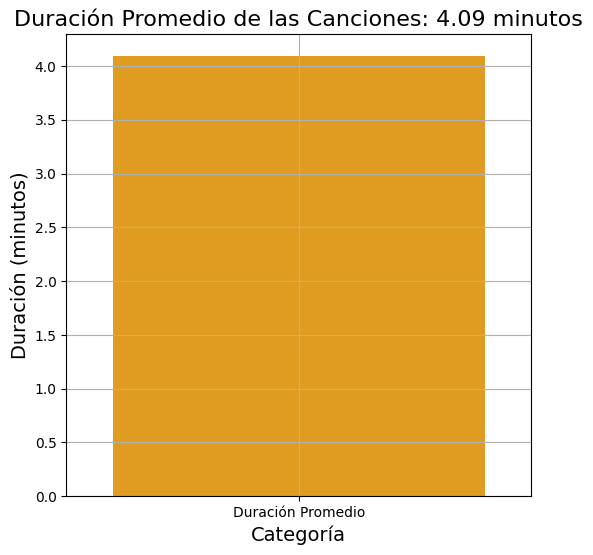

Top 10 canciones más populares de Jhené Aiko (ordenadas por popularidad descendente):
   duration_ms                              name  popularity
0     4.616000                            Sativa          79
1     6.379333          Stay Ready (What A Life)          78
2     3.581550                          stranger          75
3     4.267983                         Bed Peace          73
4     4.241550                         The Worst          73
5     3.936000                 While We're Young          72
7     4.029550                           my mine          70
8     3.547767               B.S. (feat. H.E.R.)          69
9     3.617100                        Blue Dream          68
6     2.703117  Can't Hide It (feat. Jhené Aiko)          59


In [28]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv
import matplotlib.pyplot as plt

# load the .env file variables
load_dotenv()

CLIENT_ID = os.getenv("CLIENT_ID")
CLIENT_SECRET = os.getenv("CLIENT_SECRET")
print(f"CLIENT_ID: {CLIENT_ID}")
print(f"CLIENT_SECRET: {CLIENT_SECRET}")
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


search_result = sp.search("Jhené Aiko", type="artist", limit=1)

if search_result['artists']['items']:
    artist_id = search_result['artists']['items'][0]['id']
    print(f"ID de Jhené Aiko encontrado: {artist_id}")
    
    try:
        response = sp.artist_top_tracks(artist_id, country="US")
        
        if response:
            tracks = response["tracks"]
            tracks = [
                {k: (v / (1000 * 60)) if k == "duration_ms" else v for k, v in track.items() if k in ["name", "popularity", "duration_ms"]}
                for track in tracks
            ]
            
            track_data = tracks
            df_tracks = pd.DataFrame(track_data)
            
            # Calcular la duración promedio en minutos desde la columna 'duration_ms' convertida
            average_duration = df_tracks['duration_ms'].mean()  # Esta columna ahora está en minutos
            
            # Graficar la duración promedio
            plt.figure(figsize=(6, 6))
            sns.barplot(x=["Duración Promedio"], y=[average_duration], color='orange')
            plt.title(f'Duración Promedio de las Canciones: {average_duration:.2f} minutos', fontsize=16)
            plt.ylabel('Duración (minutos)', fontsize=14)
            plt.xlabel('Categoría', fontsize=14)
            plt.grid(True)
            plt.show()

            # Ordenar las canciones por popularidad descendente
            df_tracks_sorted = df_tracks.sort_values(by='popularity', ascending=False)
            
            print("Top 10 canciones más populares de Jhené Aiko (ordenadas por popularidad descendente):")
            print(df_tracks_sorted.head(10))
        else:
            print("No se obtuvieron datos de las canciones.")
    except Exception as e:
        print(f"Error al obtener las canciones: {e}")
else:
    print("No se encontró a Jhené Aiko.")